### 同じアルゴリズムの比較グラフを作成するプログラム

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **シナリオで比較をする場合**

設定：ネットワーク・シナリオ・アルゴリズム

In [19]:
dir_name = '_sampleData'
net_name = 'Sample'
scenarios = ['Scenario_2', 'Scenario_1', 'Scenario_3']
comp_name = '# of time_window'
comp_val = [7, 10, 20]
algo = 'FISTA_D'
# 対象の問題が「主問題 or 双対問題」
primal_or_dual = 'dual'

# ------！！！変更するのはこの上まで！！！----------------


# ディレクトリの場所を取得
root = os.path.dirname(os.path.abspath('.'))
root = os.path.join(root, '..', dir_name, net_name)

# グラフを作成するために必要なデータが揃っているかを確認
# (実行時にoutputが無ければOK)
files = os.listdir(root)
for scene in scenarios:
    if scene not in files:
        print('Scenario: ', scene, 'is not existed!')
    elif algo not in os.listdir(os.path.join(root, scene, 'result')):
        print('Dir: dirname//netname//scene//result//algo is not existed'.replace('dirname', dir_name).replace('netname', net_name).replace('scene', scene).replace('algo', algo))
    elif 'result.csv' not in os.listdir(os.path.join(root, scene, 'result', algo)):
        print('File: dirname//netname//scene//result//algo//result.csv is not existed'.replace('dirname', dir_name).replace('netname', net_name).replace('scene', scene).replace('algo', algo))

# 比較変数を辞書として登録
comp_val = dict(zip(scenarios, comp_val))
comp_val = dict(sorted(comp_val.items(), key=lambda x: x[1]))
scenarios = list(comp_val.keys())
# print(comp_val)


In [20]:
# データの読み込み
data = {}
for scene in scenarios:
    data[scene] = pd.read_csv(os.path.join(root, scene, 'result', algo, 'result.csv'))
    # 目的関数の相対誤差を追加
    obj = np.array(list(data[scene]['now_obj']))
    obj_error = obj - obj[-1]
    if primal_or_dual == 'dual':
        obj = -obj
    sol_obj = obj[-1]
    data[scene]['obj_error'] = obj_error
    # print(data[scene]['now_obj'])

横軸・縦軸：どちらも data の columns から読み取る

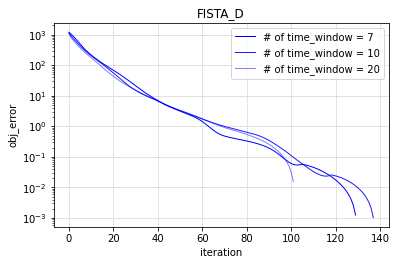

In [24]:
# 横軸を何にするか
# [Iteration, para_time, total_time, now_conv, now_lips, num_call_obj, num_call_nbl, num_call_proj, num_call_conv, obj_error]
yokoziku = 'Iteration'
yoko_name = 'iteration'

tateziku = 'obj_error'
tate_name = 'obj_error'


# ここから下はグラフ化
# ---------------------------------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize = (6, 3.75))
ax1 = fig.add_subplot(111)
# ax1.set_ylim(0.0005, 10000)

# 対数にする？
ax1.set_yscale('log')
ax1.set_title(algo)

ax1.set_xlabel(yoko_name)
ax1.set_ylabel(tate_name)

ax1.grid(axis='y', lw = 0.5, ls = '--')
ax1.grid(axis='x', lw = 0.5, ls='--')

comp_val_range = max(list(comp_val.values())) - min(list(comp_val.values()))

for scene in scenarios:
    # print(data[scene])
    ax1.plot(list(data[scene][yokoziku][:-2]), list(data[scene][tateziku][:-2]), label=comp_name + ' = ' + str(comp_val[scene]), lw=1.0, c=(0, 0, 1, 1.0-0.5*(comp_val[scene]-min(list(comp_val.values())))/comp_val_range))


ax1.legend()
plt.show()
